# Explore Housing Prices in Chicago, IL



In this notebook we explore housing prices in Chicago, IL.  We investigate both median rental prices and median housing prices.  The data is broken down according to the number of bedrooms that are inside of the housing unit. The data starts in the beginning of 2008 and ends shortly prior to the start of 2020.  We load the data using functions that can be adapted for any city in the USA and we plot the data using three different methods: pandas (fast), plotly (interactive), and plotly express (fast and interactive). 

*Step 1: Import Python modules*

In [1]:
# Import Python modules
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

*Step 2: Define helper functions*

In [2]:
def load_zillow_data(state=None,county=None,region=None,city=None):
    '''
    This function creates a dataframe for whatever city you define.
    The dataframe will have a "Date" column and then it will also have  
    columns for median rental prices and columns for median house prices 
    and it will all be broken down according to the number of bedrooms 
    or according to the type of the unit.
    '''
    # Make a dictionary of file paths
    dictionary_with_file_paths = {'/kaggle/input/zillow-house-price-data/DaysOnZillow_City.csv' : 'DaysOnZillow_City',
    '/kaggle/input/zillow-house-price-data/Sale_Prices_City.csv' : 'Sale_Prices_City',
    '/kaggle/input/zillow-house-price-data/City_MedianRentalPrice_Studio.csv' : 'City_MedianRentalPrice_Studio',
    '/kaggle/input/zillow-house-price-data/City_MedianRentalPrice_1Bedroom.csv' : 'City_MedianRentalPrice_1Bedroom',
    '/kaggle/input/zillow-house-price-data/City_MedianRentalPrice_2Bedroom.csv' : 'City_MedianRentalPrice_2Bedroom',
    '/kaggle/input/zillow-house-price-data/City_MedianRentalPrice_3Bedroom.csv' : 'City_MedianRentalPrice_3Bedroom',
    '/kaggle/input/zillow-house-price-data/City_MedianRentalPrice_4Bedroom.csv' : 'City_MedianRentalPrice_4Bedroom',
    '/kaggle/input/zillow-house-price-data/City_MedianRentalPrice_5BedroomOrMore.csv' : 'City_MedianRentalPrice_5BedroomOrMore',
    '/kaggle/input/zillow-house-price-data/City_Zhvi_1bedroom.csv' : 'City_Zhvi_1bedroom',
    '/kaggle/input/zillow-house-price-data/City_Zhvi_2bedroom.csv' : 'City_Zhvi_2bedroom',
    '/kaggle/input/zillow-house-price-data/City_Zhvi_3bedroom.csv' : 'City_Zhvi_3bedroom',
    '/kaggle/input/zillow-house-price-data/City_Zhvi_4bedroom.csv' : 'City_Zhvi_4bedroom',
    '/kaggle/input/zillow-house-price-data/City_Zhvi_5BedroomOrMore.csv' : 'City_Zhvi_5BedroomOrMore',
    '/kaggle/input/zillow-house-price-data/City_Zhvi_AllHomes.csv' : 'City_Zhvi_AllHomes',
    '/kaggle/input/zillow-house-price-data/City_Zhvi_SingleFamilyResidence.csv' : 'City_Zhvi_SingleFamilyResidence',
    '/kaggle/input/zillow-house-price-data/City_Zhvi_Condominum.csv' : 'City_Zhvi_Condominum',}

    # Load the files from the file paths into a dictionary of dataframes
    dictionary_with_dataframes = {}
    for file_path, file_name in dictionary_with_file_paths.items():
        name_of_dataframe = str(file_name)
        dictionary_with_dataframes[name_of_dataframe] = pd.read_csv(file_path)
        dictionary_with_dataframes[name_of_dataframe].rename(columns={'Unnamed: 0':'which_measurement'}, inplace=True)
        dictionary_with_dataframes[name_of_dataframe]['which_measurement'] = name_of_dataframe

    # Combine the dataframes into one large dataframe that has a new column that labels each subsection
    filtered_dataframe = pd.concat(dictionary_with_dataframes.values(), ignore_index=True, sort=True)

    # Filter the data according to your needs
    states_to_keep = [state]
    counties_to_keep = [county]
    regions_to_keep = [region]
    cities_to_keep = [city]
    if state == None:
        pass
    else:
        filtered_dataframe = filtered_dataframe[filtered_dataframe.State.isin(states_to_keep)]
    if county == None:
        pass
    else:    
        filtered_dataframe = filtered_dataframe[filtered_dataframe.CountyName.isin(counties_to_keep)]
    if region == None:
        pass
    else:     
        filtered_dataframe = filtered_dataframe[filtered_dataframe.RegionName.isin(regions_to_keep)]
    if city == None:
        pass
    else:     
        filtered_dataframe = filtered_dataframe[filtered_dataframe.Metro.isin(cities_to_keep)]

    # Reshape the data
    for row in filtered_dataframe:
        final_df = filtered_dataframe[['2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
               '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12',
               '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06',
               '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12',
               '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
               '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12',
               '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
               '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
               '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
               '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
               '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
               '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
               '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
               '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
               '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
               '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
               '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
               '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
               '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
               '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
               '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
               '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
               '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
               '2019-07', '2019-08', '2019-09', '2019-10', '2019-11','which_measurement']]
        column_title = final_df['which_measurement'].values
        final_df = final_df.T[:-1]#.fillna(0)
        final_df.columns = [column_title]
    final_df.columns = ['Sale_Prices_City','City_MedianRentalPrice_Studio','City_MedianRentalPrice_1Bedroom',
                          'City_MedianRentalPrice_2Bedroom','City_MedianRentalPrice_3Bedroom',
                          'City_Zhvi_1bedroom','City_Zhvi_2bedroom','City_Zhvi_3bedroom',
                          'City_Zhvi_4bedroom','City_Zhvi_5BedroomOrMore','City_Zhvi_AllHomes',
                          'City_Zhvi_SingleFamilyResidence','City_Zhvi_Condominum']
    final_df['Date'] = final_df.index
    return final_df

def plot_seven_columns_using_plotly_regular(dataframe,column_one,column_two,column_three,column_four,column_five,column_six,column_seven,title):    
    '''
    This function plots seven numerical columns against a date column.
    It using the regular plotly library instead of plotly express.
    '''
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_one],
                        mode='lines+markers',name=column_one))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_two],
                        mode='lines+markers',name=column_two))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_three],
                        mode='lines+markers',name=column_three))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_four],
                        mode='lines+markers',name=column_four))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_five],
                        mode='lines+markers',name=column_five))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_six],
                        mode='lines+markers',name=column_six))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_seven],
                        mode='lines+markers',name=column_seven))
    fig.update_layout(title={'text':title},
                      xaxis_title='Date',yaxis_title='Median Price ($USD)',
                      legend_orientation="h",showlegend=True)
    fig.show()

def plot_seven_columns_using_plotly_express(dataframe,column_one,column_two,column_three,column_four,column_five,column_six,column_seven,title):    
    '''
    This function plots seven numerical columns against a date column.
    It using the plotly express library instead of the normal plotly library.
    '''
    df_melt = dataframe.melt(id_vars='Date', value_vars=[column_one,column_two,column_three,column_four,column_five,column_six,column_seven])
    fig = px.line(df_melt, x="Date", y="value", color="variable",title=title).update(layout=dict(xaxis_title='Date',yaxis_title='Median Price ($USD)',legend_orientation="h",showlegend=True))
    fig.show()

def plot_four_columns_using_plotly_regular(dataframe,column_one,column_two,column_three,column_four,title,lower_axis_limit,upper_axis_limit):    
    '''
    This function plots four numerical columns against a date column.
    It using the regular plotly library instead of plotly express.
    '''
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_one],
                        mode='lines+markers',name=column_one))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_two],
                        mode='lines+markers',name=column_two))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_three],
                        mode='lines+markers',name=column_three))
    fig.add_trace(go.Scatter(x=dataframe.Date, y=dataframe[column_four],
                        mode='lines+markers',name=column_four))
    fig.update_layout(title={'text':title},
                      xaxis_title='Date',yaxis_title='Median Price ($USD)',
                      legend_orientation="h",showlegend=True)
    fig.update_layout(xaxis=dict(range=[lower_axis_limit,upper_axis_limit]))
    fig.show()    
    
def plot_four_columns_using_plotly_express(dataframe,column_one,column_two,column_three,column_four,title,lower_axis_limit,upper_axis_limit):
    '''
    This function plots four numerical columns against a date column.
    It using the plotly express library instead of the normal plotly library.
    '''
    df_melt = dataframe.melt(id_vars='Date', value_vars=[column_one,column_two,column_three,column_four])
    fig = px.line(df_melt, x="Date", y="value", color="variable",title=title).update(layout=dict(xaxis_title='Date',yaxis_title='Median Price ($USD)',legend_orientation="h",showlegend=True))
    fig.update_xaxes(range=[lower_axis_limit,upper_axis_limit])
    fig.show()


*Step 3: Load the data*

In [3]:
# Load and plot the data for the state, county, region, or city that you are interested in.  
chicago_df = load_zillow_data(state='IL',county='Cook County',
                              region='Chicago',city='Chicago-Naperville-Elgin')

In [4]:
# df = pd.read_csv('/kaggle/input/zillow-house-price-data/City_MedianRentalPrice_2Bedroom.csv')
# df = df.loc[df['State'] == 'IL']
# df.sort_values('SizeRank').head(100)

*Step 4: Preview the data*

Using [Pandas](https://pandas.pydata.org/)

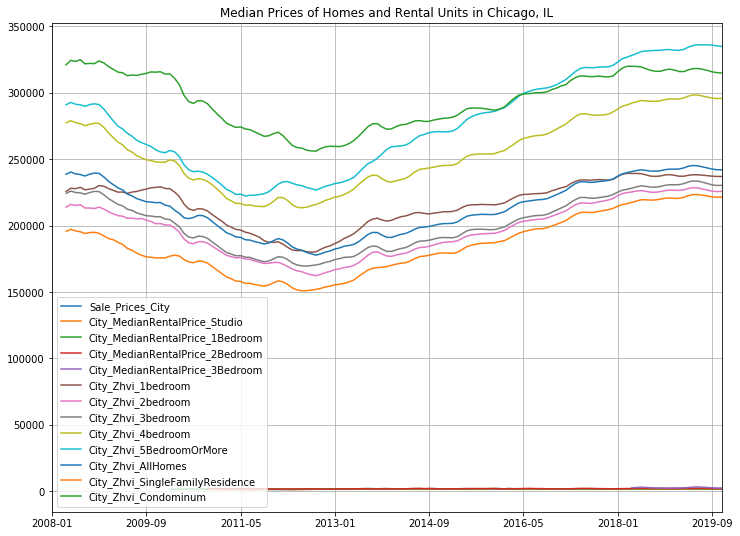

In [5]:
chicago_df.plot(title='Median Prices of Homes and Rental Units in Chicago, IL',figsize=(12,9), grid=True)

*Step 5: Plot median rental prices*

Using [Plotly](https://plot.ly/)

In [6]:
# Plot median rental prices using the regular plotly library instead of using plotly express
plot_four_columns_using_plotly_regular(chicago_df,'City_MedianRentalPrice_Studio', 
                                       'City_MedianRentalPrice_1Bedroom','City_MedianRentalPrice_2Bedroom',
                                       'City_MedianRentalPrice_3Bedroom','Median Rental Prices in Chicago, IL',
                                      '2011-12-01','2020-01-01')

Using [Plotly Express](https://plot.ly/python/plotly-express/)

In [7]:
# Plot median rental prices using plotly express
plot_four_columns_using_plotly_express(chicago_df,'City_MedianRentalPrice_Studio','City_MedianRentalPrice_1Bedroom',
                                       'City_MedianRentalPrice_2Bedroom','City_MedianRentalPrice_3Bedroom',
                                       'Median Rental Prices in Chicago, IL','2011-12-01','2020-01-01')

*Step 6: Plot median house prices*

Using [Plotly](https://plot.ly/)

In [8]:
# Plot median house prices using the regular plotly library instead of using plotly express
plot_seven_columns_using_plotly_regular(chicago_df,'City_Zhvi_Condominum', 'City_Zhvi_SingleFamilyResidence',
                                        'City_Zhvi_1bedroom','City_Zhvi_2bedroom','City_Zhvi_3bedroom',
                                        'City_Zhvi_4bedroom','City_Zhvi_5BedroomOrMore','Median Home Prices in Chicago, IL')

Using [Plotly Express](https://plot.ly/python/plotly-express/)

In [9]:
# Plot median home prices using plotly express
plot_seven_columns_using_plotly_express(chicago_df,'City_Zhvi_Condominum', 'City_Zhvi_SingleFamilyResidence',
                                        'City_Zhvi_1bedroom','City_Zhvi_2bedroom','City_Zhvi_3bedroom',
                                        'City_Zhvi_4bedroom','City_Zhvi_5BedroomOrMore','Median Home Prices in Chicago, IL')